In [56]:
import pandas as pd


In [57]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df_new = df.drop(['PassengerId','Name','SibSp','Parch','Cabin','Embarked','Ticket'],axis='columns')
df_new

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [59]:
df_new.Age = df_new.Age.fillna(df_new.Age.mean())

In [60]:
df_new.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [61]:
#from sklearn.preprocessing import LabelEncoder
#le_Sex = LabelEncoder()
#df_new['Sex_n'] = le_Sex.fit_transform(df_new['Sex'])

Instead of transforming data we will map gender in 1 or 2

In [62]:
# = df_new.drop('Sex_n',axis = 'columns')

In [63]:
df_new.Sex = df_new.Sex.map({'male': 1, 'female': 2})
df_new.Sex[:10]

0    1
1    2
2    2
3    2
4    1
5    1
6    1
7    1
8    2
9    2
Name: Sex, dtype: int64

In [66]:
inputs = df_new.drop('Survived',axis='columns')
Target = df_new.Survived
inputs.head(10)

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
5,3,1,29.699118,8.4583
6,1,1,54.000000,51.8625
7,3,1,2.000000,21.0750
8,3,2,27.000000,11.1333
9,2,2,14.000000,30.0708


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,Target,test_size=0.2)
len(X_train)

712

In [81]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
model.score(X_test,y_test)

0.770949720670391

In [85]:
model.predict([['3','1','2','21.0750']])

array([0])

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
X = df_new['Sex']
y = df_new['Survived']

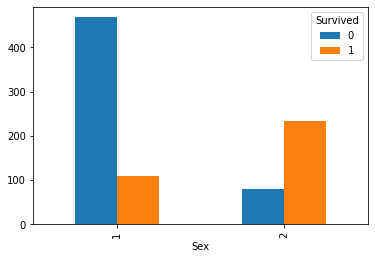

In [90]:
pd.crosstab(X,y).plot(kind="bar")